In [2]:
import pydicom
import dicom
import os

D:\anaconda\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
PATH = 'F:/data_Perfusion'
path_bSVD = '/CTP/bSVD'
path_sSVD = '/CTP/sSVD'
path_ROI = '/ROI'

In [4]:
def getListDir(path):
    try:
        list_dir = os.listdir(path)
        patient_list = [os.path.join(path, x) for x in list_dir]
        return patient_list
    except:
        pass

In [5]:
sSVD_file_list = getListDir(PATH+path_sSVD)
print(sSVD_file_list)

['F:/data_Perfusion/CTP/sSVD\\001-001', 'F:/data_Perfusion/CTP/sSVD\\001-017', 'F:/data_Perfusion/CTP/sSVD\\001-073', 'F:/data_Perfusion/CTP/sSVD\\001-112', 'F:/data_Perfusion/CTP/sSVD\\002-022', 'F:/data_Perfusion/CTP/sSVD\\002-023', 'F:/data_Perfusion/CTP/sSVD\\004-009', 'F:/data_Perfusion/CTP/sSVD\\010-007', 'F:/data_Perfusion/CTP/sSVD\\018-018', 'F:/data_Perfusion/CTP/sSVD\\049-121']


In [6]:
def loadDicom(path_list):
    ds_list = []
    ds_path_list =[]
    for p in path_list:
        dicom_list = getListDir(p)
        if dicom_list is not None:
            for d in dicom_list:
                try:
                    ds = dicom.read_file(d)
                    ds_list.append(ds)
                    ds_path_list.append(d)
                except:
                    pass
    return ds_path_list, ds_list

In [7]:
sSVD_path_list, sSVD_dicom_list = loadDicom(sSVD_file_list)

In [9]:
len(sSVD_dicom_list)

4464

In [10]:
len(sSVD_path_list)

4464

In [11]:
import pandas as pd

In [12]:
def createDataFrame(ds_list, ds_path_list):
    patient_ID_list = [x.PatientID for x in ds_list]
    series_descript_list = [x.SeriesDescription for x in ds_list]
    series_ID = [x.SeriesInstanceUID for x in ds_list]
    instance_num_list = [x.InstanceNumber for x in ds_list]
    
#     collect_diameter_list = [x.DataCollectionDiameter for x in ds_list]
#     slice_thickness = [x.SliceThickness for x in ds_list] 
#     space_betw_slice = [x.SpacingBetweenSlices for x in ds_list]
    df = pd.DataFrame({'Patient_ID': patient_ID_list, 'Series_Description':series_descript_list,
                       'Series_ID': series_ID, 'File_Path':ds_path_list, 'Instance_Number': instance_num_list})
    return df

In [13]:
sSVD_df = createDataFrame(sSVD_dicom_list, sSVD_path_list)

In [14]:
sSVD_df.head()

,Patient_ID,Series_Description,Series_ID,File_Path,Instance_Number
0,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,1
1,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,2
2,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,3
3,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,4
4,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,5


In [15]:
patient_file = sSVD_df.File_Path.str.split('\\')
patient_file = patient_file.rename('Patient_File')
patient_file = patient_file.apply(lambda x: os.path.join(x[0], x[1]))
patient_file.name
sSVD_df = pd.concat([sSVD_df, patient_file], axis=1)

In [16]:
sSVD_df.head()

,Patient_ID,Series_Description,Series_ID,File_Path,Instance_Number,Patient_File
0,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/sSVD\001-001
1,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,2,F:/data_Perfusion/CTP/sSVD\001-001
2,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,3,F:/data_Perfusion/CTP/sSVD\001-001
3,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,4,F:/data_Perfusion/CTP/sSVD\001-001
4,NCT68331,BAT,1.2.826.0.1.3680043.8.669.20189213259.01.95334...,F:/data_Perfusion/CTP/sSVD\001-001\NCT68331_DI...,5,F:/data_Perfusion/CTP/sSVD\001-001


In [19]:
sSVD_df.to_csv(os.path.join(PATH+path_sSVD, 'sSVD.csv'))

In [53]:
content_list = bSVD_df.Series_Description.unique()

In [54]:
print(content_list)

['BAT' 'TTP' 'BET' 'FWHM' 'Cmax' 'NEI' 'dSoverS' 'MS' 'fMTT_with_DC'
 'fMTT_without_DC' 'CBV-AUC' 'CBF-bSVD' 'CBF2-bSVD' 'CBV-bSVD' 'CBV2-bSVD'
 'MTT-bSVD' 'MTT2-bSVD' 'Tmax-bSVD']


In [55]:
%matplotlib inline

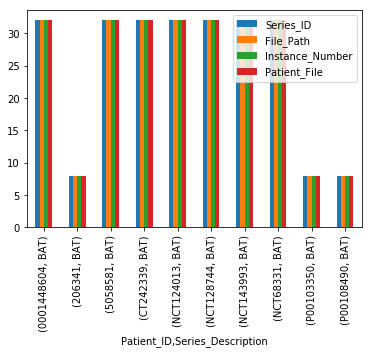

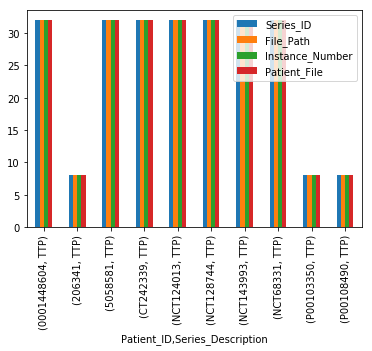

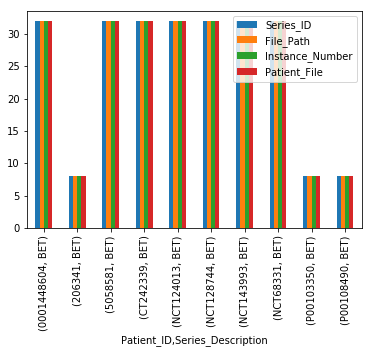

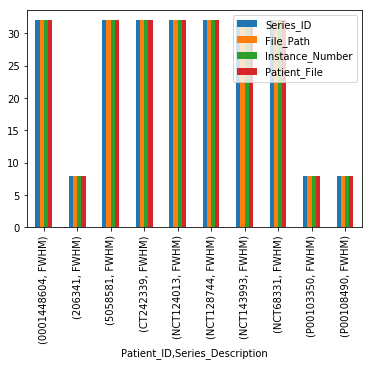

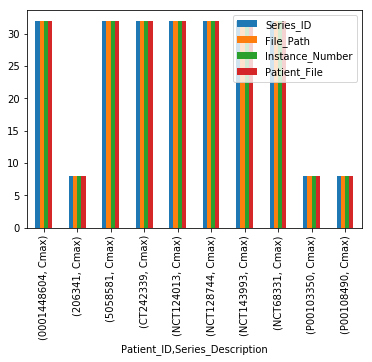

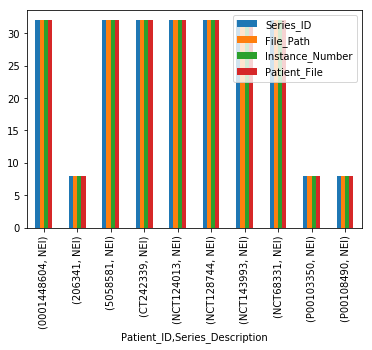

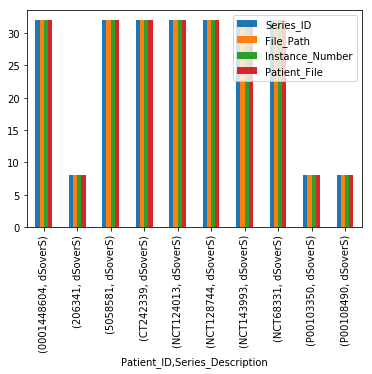

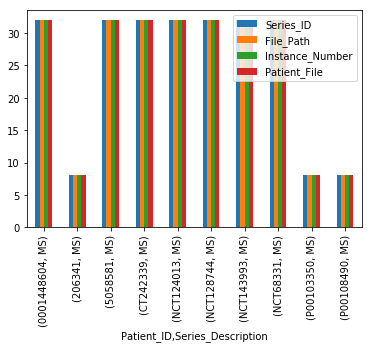

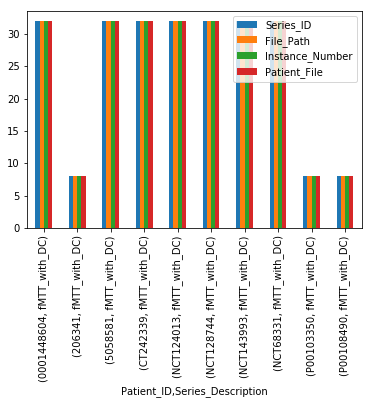

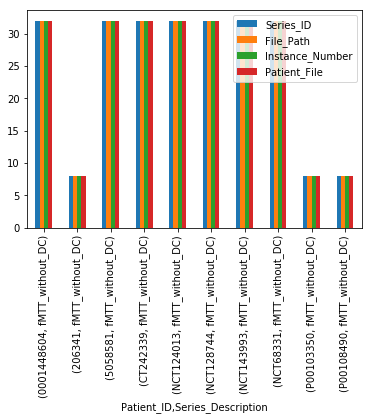

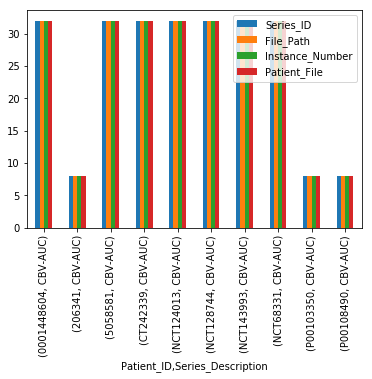

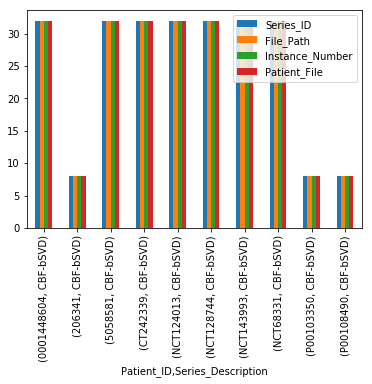

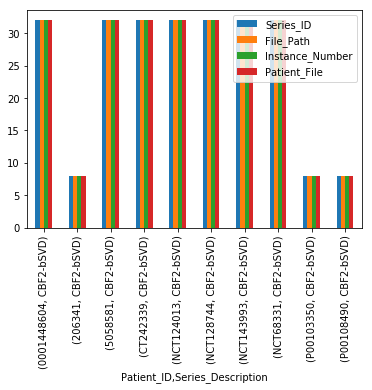

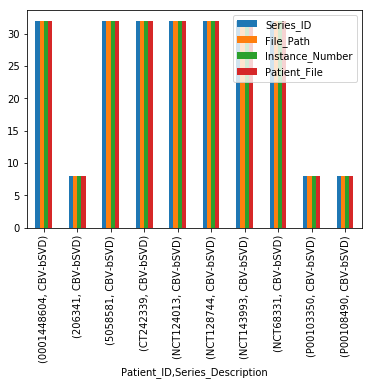

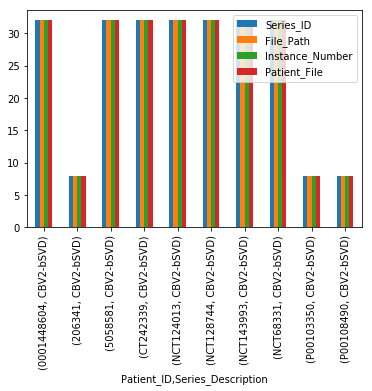

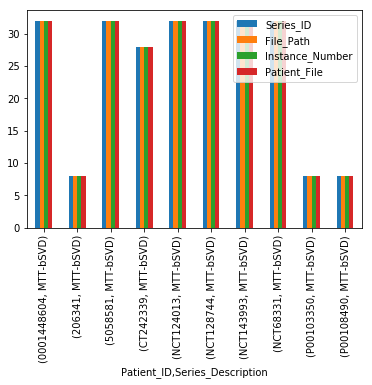

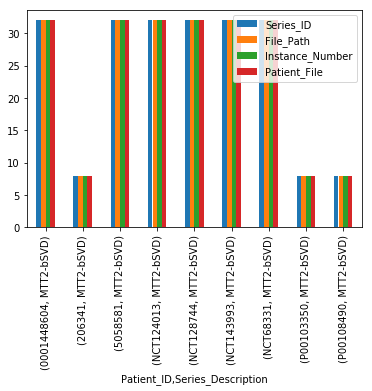

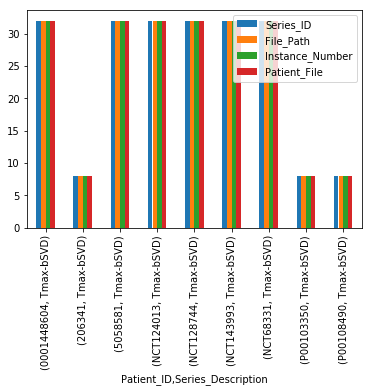

In [56]:
for i in range(len(content_list)):
    bSVD_df[bSVD_df.Series_Description==content_list[i]].groupby(['Patient_ID', 'Series_Description']).count().plot(kind='bar')

In [57]:
CT_file_list = getListDir(PATH+path_ROI)
print(CT_file_list)

['F:/data_Perfusion/ROI\\001-001', 'F:/data_Perfusion/ROI\\001-017', 'F:/data_Perfusion/ROI\\001-073', 'F:/data_Perfusion/ROI\\001-112', 'F:/data_Perfusion/ROI\\002-022', 'F:/data_Perfusion/ROI\\002-023', 'F:/data_Perfusion/ROI\\004-009', 'F:/data_Perfusion/ROI\\010-007', 'F:/data_Perfusion/ROI\\018-018', 'F:/data_Perfusion/ROI\\049-121', 'F:/data_Perfusion/ROI\\image.csv', 'F:/data_Perfusion/ROI\\ROI.csv']


In [58]:
image_file_list = [os.path.join(x,'Images') for x in CT_file_list]
print(image_file_list)

['F:/data_Perfusion/ROI\\001-001\\Images', 'F:/data_Perfusion/ROI\\001-017\\Images', 'F:/data_Perfusion/ROI\\001-073\\Images', 'F:/data_Perfusion/ROI\\001-112\\Images', 'F:/data_Perfusion/ROI\\002-022\\Images', 'F:/data_Perfusion/ROI\\002-023\\Images', 'F:/data_Perfusion/ROI\\004-009\\Images', 'F:/data_Perfusion/ROI\\010-007\\Images', 'F:/data_Perfusion/ROI\\018-018\\Images', 'F:/data_Perfusion/ROI\\049-121\\Images', 'F:/data_Perfusion/ROI\\image.csv\\Images', 'F:/data_Perfusion/ROI\\ROI.csv\\Images']


In [59]:
ROI_file_list = [os.path.join(x,'ROI.npz') for x in CT_file_list]
print(ROI_file_list)

['F:/data_Perfusion/ROI\\001-001\\ROI.npz', 'F:/data_Perfusion/ROI\\001-017\\ROI.npz', 'F:/data_Perfusion/ROI\\001-073\\ROI.npz', 'F:/data_Perfusion/ROI\\001-112\\ROI.npz', 'F:/data_Perfusion/ROI\\002-022\\ROI.npz', 'F:/data_Perfusion/ROI\\002-023\\ROI.npz', 'F:/data_Perfusion/ROI\\004-009\\ROI.npz', 'F:/data_Perfusion/ROI\\010-007\\ROI.npz', 'F:/data_Perfusion/ROI\\018-018\\ROI.npz', 'F:/data_Perfusion/ROI\\049-121\\ROI.npz', 'F:/data_Perfusion/ROI\\image.csv\\ROI.npz', 'F:/data_Perfusion/ROI\\ROI.csv\\ROI.npz']


In [60]:
image_path_list, image_dicom_list = loadDicom(image_file_list)

In [61]:
len(image_file_list)

12

In [62]:
len(image_dicom_list)

300

In [63]:
len(image_path_list)

300

In [73]:
image_df = createDataFrame(image_dicom_list, image_path_list)
image_df.head()

,Patient_ID,Series_Description,Series_ID,File_Path,Instance_Number
0,NCT68331,HEAD 5mm,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\1,1
1,NCT68331,HEAD 5mm,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\10,10
2,NCT68331,HEAD 5mm,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\11,11
3,NCT68331,HEAD 5mm,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\12,12
4,NCT68331,HEAD 5mm,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\13,13


In [74]:
image_df = image_df.drop('Series_Description' ,axis=1)

In [75]:
image_df.head()

,Patient_ID,Series_ID,File_Path,Instance_Number
0,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\1,1
1,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\10,10
2,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\11,11
3,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\12,12
4,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\13,13


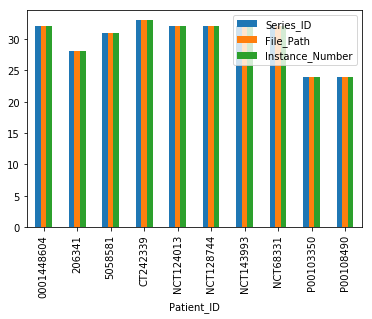

In [67]:
image_df.groupby('Patient_ID').count().plot(kind='bar')

In [68]:
ROI_df = pd.DataFrame(ROI_file_list, columns=['ROI_path'])

In [69]:
ROI_df.head()

,ROI_path
0,F:/data_Perfusion/ROI\001-001\ROI.npz
1,F:/data_Perfusion/ROI\001-017\ROI.npz
2,F:/data_Perfusion/ROI\001-073\ROI.npz
3,F:/data_Perfusion/ROI\001-112\ROI.npz
4,F:/data_Perfusion/ROI\002-022\ROI.npz


In [76]:
patient_file = image_df.File_Path.str.split('\\')
patient_file = patient_file.rename('Patient_File')
patient_file = patient_file.apply(lambda x: os.path.join(x[0], x[1], x[2]))
patient_file.name
image_df = pd.concat([image_df, patient_file], axis=1)

In [77]:
image_df.head()

,Patient_ID,Series_ID,File_Path,Instance_Number,Patient_File
0,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\1,1,F:/data_Perfusion/ROI\001-001\Images
1,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\10,10,F:/data_Perfusion/ROI\001-001\Images
2,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\11,11,F:/data_Perfusion/ROI\001-001\Images
3,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\12,12,F:/data_Perfusion/ROI\001-001\Images
4,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\13,13,F:/data_Perfusion/ROI\001-001\Images


In [78]:
image_df.to_csv(os.path.join(PATH+path_ROI, 'image.csv'))

In [131]:
ROI_df.to_csv(os.path.join(PATH+path_ROI, 'ROI.csv'))

* CT 配准了吗？
* 切片数量不一致
* ROI怎么样显示